# Week2課後練習: 遠距教學新聞的特徵詞抽取
2021年由於疫情關係遠距教學十分盛行，很多學者對遠距教學裡頭的學生端以及教師端進行不少研究，而在這個任務中我們將從另一個新的角度來探討遠距教學對社會的影響，我們蒐集了10篇從**聯合新聞網**的新聞，利用關鍵字*遠距教學*進行檢索，並取出前十篇進行分析。

## 檢視資料

In [14]:
import pandas as pd
newsDF = pd.read_csv("udn-news.csv",encoding = "utf-8",names=["標題", "類別", "內容"])
newsDF

,標題,類別,內容
0,仁寶Q3營收 可望成長,股市,代工廠大仁寶（2324）今年來持續受惠居家工作、遠距教學等宅經濟熱潮，推升筆電銷售暢旺，惟第...
1,元山 下半年出貨 看增,股市,隨著歐美疫苗施打率日益提升，車市有望在下半年回溫，國內車用電子與生活科技系統廠元山（6275...
2,宅經濟退燒 Chromebook、平板看淡,產經,新冠肺炎疫情引發居家工作、遠距教學熱潮，帶來的Chromebook、平板等宅經濟硬體需求熱...
3,暑假將至...兒盟籲政府助弱勢兒少課輔轉型線上陪伴,文教,全台學校自5月下旬停止到校上課，採遠距學習，兒福聯盟今舉行「弱勢兒少數位學習困境與對策」線上...
4,竹市議員發起愛心筆電助學計畫 支援弱勢學子暑假學習,文教,三級警戒以來全國已停課快兩個月，所有學生需依賴3C設備線上上課，弱勢家庭數位落差大，缺乏手機...
5,手機終有訊號了 雙溪區魚行里基地台啟用,地方,雙溪區魚行里的坤溪、公館、八股、丁子蘭等聚落，一直以來都是區內通訊的隱蔽帶，造成居民手機訊號...
6,避免「線上中輟」！中山工商遠距教學按表操課點名課輔,文教,疫情讓各級學校停課」，採遠距教學已超過一個月，有學校出現「線上中輟」現象，令家長憂心忡忡。高...
7,遠距教學成「遠距中輟」 教部要成立數位學習資源中心,文教,全國各級學校因疫停課超過一個月，教育部國教署今天表示，將於7月1日在國立中興大學附屬高級中學...
8,宏碁營運佳 邁向填息路,股市,PC品牌大廠宏碁（2353）昨（30）日除權息，每股派發現金股利1.5元，昨日股價開低走高，...
9,ViewSonic啟動「前進教學新常態」線上課程,產經,為協助全台學校進行線上遠距教學，全球視訊與教育解決方案領導品牌ViewSonic將啟動「前進...


### 任務敘述:
這裡一共有十篇新聞(從0~9因為python是從0開始算)，我們可以發現，這邊新聞類別有股市、產經、文教、地方，而藉由觀察不同類別中的特徵詞，我們可以窺知遠距教學對於社會不同層面上的影響，而這就是我們這次的任務: **針對不同類別找出他們的特徵詞，並且解釋這些特徵詞的意義**。這是一個非常有趣的任務，讓我們現在就開始吧!


## 任務1: 找出文教類的特徵詞
請運用Articut裡頭`extract_tags()`這個功能找出文教類的前20名特徵詞吧!

In [30]:
# 先將文教類的文本都抽出來合併再一起
educationDF = newsDF[newsDF["類別"] == "文教"] #將類別等於文教的存在一個educationDF上面
educationSTR = " ".join(educationDF["內容"]) #把educationDF裡面的內容欄用我們之前學過的join功能把內容都連起來，存成字串

In [29]:
educationSTR #檢查一下前30個字符

'全台學校自5月下旬停止到校上課，採遠距學習，兒福聯盟今舉行「弱勢兒少數位學習困境與對策」線上座談指出，弱勢兒少的數位學習落差正持續擴大，南投縣信義鄉人和國小教師呂家賢則提醒，除關注數位學習落差，孩子無法從網路下線、誤觸不當內容的「數位危害」問題更大。因暑假將屆，兒盟也呼政府部門協助社區實體課輔轉型為線上陪伴方案，並召募志工，解決暑假期間弱勢兒少缺乏陪伴及數位學習的困境，也可藉此讓家長紓壓喘息。  兒盟於6月16日至25日針對所服務的偏鄉國小進行學習資源現況調查，共收集303所學校，兒盟執行長白麗芳說，調查發現12.5%的偏鄉小學指出，超過8成學生需要學校提供設備，顯示偏鄉學生的硬體設備不足；53.1%希望外界提供學生網路連線設備；此外，有12.2%的偏鄉小學表示，有４成以上學生因家人外出工作，常常獨自在家線上學習，沒有家人可陪伴和協助。  PaGamO學習平台創辦人葉丙成指出，社會普遍關注的是弱勢孩童的數位學習資源，然而，他認為，台灣孩子欠缺的是數位素養能力，弱勢孩子沒有家長幫忙不見得是壞事，反而可練就自己找資源的數位素養，只要給予設備，孩子通常不難上手。  呂家賢也分享教學現場觀察。他表示，對部分偏鄉學校來說，數位環境佈建完整，上網已不成問題，問題在於孩子沉迷網路，或因未確實做內容分流，讓數位養分成了數位糖果、數位毒品，導致偏鄉孩子在缺乏家庭教育的內在弱勢下，還須面對數位內容等外部威脅，若由學校提供數位設備，由校方進行後台管制，就能避免跟家長共用載具及過度上網。  為解決停課期間兒少數位學習困境，兒盟呼籲，應儘速補足學生數位設備缺口，強化弱勢兒少數位學習個別化協助，也建議教育部參照英國的科技指導計畫（EdTech Demonstrator programme），利用即將來臨的暑假，全面盤點學校現有數位資源，並擴大辦理教師線上教學培訓計畫，提升教師遠距教學質量。  此外，兒盟調查也發現，嚴峻疫情中，仍有14.9%的偏鄉國小積極透過各種方式辦理暑期活動來陪伴弱勢兒少，呼籲教育部協助召募領有教師證的師資人力、大學生、退休老師等，擔任弱勢兒少的暑期線上課輔或陪讀志工；同時呼籲衛福部社家署整合縣市社區資源，協助將實體課輔轉型為線上陪伴方案，除能因應弱勢兒少缺乏陪伴及數位學習困境，也可藉此讓家長紓壓喘息。  針對兒少網路安全教育，兒盟則認為，停課後兒少在家上課，玩線上遊戲、

In [32]:
from ArticutAPI import Articut
username = ""
apikey = ""
#如果需要apikey作為教學用途的話可以去卓騰語言科技申請喔!
articut = Articut(username,apikey) 
educationResultDICT = articut.parse(educationSTR , level = 'lv2')
education_TFIDF = articut.analyse.extract_tags(educationResultDICT)
print(education_TFIDF) 

[' ', '數位', '線上', '上課', '設備', '教學', '學習', '弱勢兒', '兒盟', '弱勢', '疫情', '老師', '學生', '學校', '線', '暑假', '陪伴', '停課', '中輟', '孩子', '遠距', '偏鄉', '校方', '跟', '兒', '缺乏', '網路', '家長', '資源', '協助', '困境', '落差', '上學', '習', '家', '筆電', '使用', '中山', '導師', '高級', '評量', '或', '少', '因', '讓', '教師', '內容', '實體', '服務', '不足', '辦理', '狀況', '專線', '0800', '手機', '李妍慧', '茄苳', '愛心筆電', '工商', '林昭億', '專業', '金門', '國教署', '中等', '優質化', '上網', '提供', '課程', '情形', '二', '教育部', '呼籲', '計畫', '他', '表示', '也', '能', '採', '超過', '同時', '設計', '國小', '由', '擴大', '呂家賢', '除', '關注', '課輔', '轉型', '方案', '召募', '志工', '期間', '藉此', '紓壓', '喘息', '針對', '偏鄉小', '硬體設備', '連線', '此外', '家人', '家線', '數位素', '沉迷', '確實', '盤點', '暑', '少網路', '兩個月', '所有', '大庄國小', '孩子家', '謝佳曄', '跟著', '同步', '程', '合作', '各級', '一個月', '點名', '這波', '教室', '鼓勵', '上傳', '伯父', '回', '資源中心', '各類', '上線', '研發', '高中職', '選修', '家庭', '已', '學', '成立', '將', '與', '並', '調查', '需要', '須', '強化', '提升', '期', '性', '教', '電腦', '應用', '現象', '校長', '全校', '示範', '相關', '人', '指出', '無法', '及', '沒有', '問題', '推動', '可', '於', '養', '現場', '部分', '結合', 

In [34]:
#請取出前二十名
education_TFIDF[:20]

[' ',
 '數位',
 '線上',
 '上課',
 '設備',
 '教學',
 '學習',
 '弱勢兒',
 '兒盟',
 '弱勢',
 '疫情',
 '老師',
 '學生',
 '學校',
 '線',
 '暑假',
 '陪伴',
 '停課',
 '中輟',
 '孩子']

## 任務2: 找出股市類的特徵詞
請運用Articut裡頭`extract_tags()`這個功能找出股市類的前20名特徵詞吧!

In [35]:
# 先將文教類的文本都抽出來合併再一起
stockDF = newsDF[newsDF["類別"] == "股市"] #將類別等於文教的存在一個educationDF上面
stockSTR = " ".join(stockDF["內容"]) #把educationDF裡面的內容欄用我們之前學過的join功能把內容都連起來，存成字串

In [37]:
stockSTR #檢查一下前30個字符

'代工廠大仁寶（2324）今年來持續受惠居家工作、遠距教學等宅經濟熱潮，推升筆電銷售暢旺，惟第2季受零組件缺貨加劇影響，營收表現恐低於預期。法人預估，下半年進入仁寶非PC業務出貨旺季，加上第2季遞延的訂單將在第3季發酵，預料第3季營收可望優於第2季。  仁寶今年4、5月受到零組件缺貨影響，導致筆電出貨低於預期，非PC業務也有缺料情況，進一步拖累營運表現，導致第2季營收可能較首季衰退個位數百分比。  不過，仁寶5月初為活化資產，宣布出售子公司仁寶視訊電子（昆山）不動產，預計處分利益約人民幣4.66億元（約新台幣20億元），若最快在第2季認列相關業外收益，有助獲利較首季成長。  法人指出，仁寶第2季除零組件缺料外，運輸供給不順也進一步造成出貨延遲，預期相關訂單將遞延將至第3季，加上下半年新機開始出貨，非PC業務進入傳統出貨旺季，預估第3季營運表現將優於第2季。  仁寶5月營收802億元，月減10.2%、年減8.5%，為三個月低點；前五月合併營收為4,395億元，年增20.8%，為同期最佳。出貨量方面，仁寶5月筆電出貨380萬台，月減60萬台，主要受到零組件缺料影響，出貨低於預期且往後遞延，惟仁寶第2季仍將力拚筆電出貨較第1季成長。  展望2021年，由於居家工作、遠距教學等需求持續，目前仁寶筆電訂單仍供不應求，預期公司在Chromebook、商用筆電帶動下，全年PC出貨量仍有一成以上增長幅度。 隨著歐美疫苗施打率日益提升，車市有望在下半年回溫，國內車用電子與生活科技系統廠元山（6275）正全力搶攻車用風扇市場，對下半年營運維持樂觀態度。法人預估，元山第3季起將出貨動能將開始增強，下半年營運可望優於上半年。  法人表示，歐美經濟正逐步復甦，推升高階車款的銷售熱度，由於元山主攻車內風扇領域，其中高階車款在座椅通風的使用量大，而元山已是歐洲各大車廠的主要供應商，下半年訂單成長可期。  據悉，元山塔崗廠自去年起開始貢獻營運，帶動營收規模明顯跳升，在去年高基期情況下，今年仍持續受惠車用風扇與高階運算帶動市場不斷擴張，其中近期國內疫情升溫，居家辦公與遠距教學比例提高，宅經濟需求再次發威，主機板、儲存硬碟等客製化組裝市場熱度持續攀升，明顯挹注風扇需求。  元山今年5月營收3.34億元，月減4.5%，年增1.6%；前五月營收16.37億元，年增19.2%。該公司近期車用風扇與高階運算維

In [38]:
stockResultDICT = articut.parse(stockSTR , level = 'lv2')
stock_TFIDF = articut.analyse.extract_tags(stockResultDICT)
print(stock_TFIDF) 

[' ', '營收', '出貨', '5月', '第', '增', '2季', '仁寶', '需求', '半年', '訂單', '營運', '成長', '元', '宏碁', '年', '仍', '零組', '筆電', '預期', '法人', '遞延', '3季', '高階', '持續', '山', '遠距', '惟', '件', '表現', 'PC', '供給', '月', '展望', '科技', '預估', '今年', '減', '居家工作', '旺', '缺貨', '低於', '業務', '受到', '除', '前五月', '合併', '公司', '車', '風扇', '運算', '昨日', '大於', '下', '維持', '影響', '較', '經濟', '去年', '用', '非', '指出', '目前', '將', '受惠', '推升', '銷售', '季', '發酵', '望優', '進一步', '首季', '子公司', '電子', '件缺', '料', '運輸', '同期', '且', '筆電訂單', 'Chromebook', '歐美', '國內', '樂觀', '態度', '動', '車款', '近期', '宅', '產品', '材料', '貨櫃', '短缺', ' PC', '權息', '股價', '低走', '終場', '收', '29.3元', '未', '教學', '明顯', '進', '開始', '帶動', '導致', '情況', '往', '開', '高', '生活', '於', '能', '進入', '比', '約', '正', '主要', '由於', '未來', '加上', '代工廠', '大仁寶', '2324', '宅經濟', '熱潮', '暢', '加劇', '恐', '預料', '4', '缺料', '拖累', '衰退', '位數', '百分', '5月初', '活化', '資產', '宣布', '出售', '仁寶視訊', '昆山', '不動產', '預計', '分利益', '人民幣', '4.66億元', '新台幣', '20億元', '認列', '相關業', '收益', '有助', '獲利', '不順', '延遲', '新機', '優', '802億元', '10.2%', '8.5%', '三個月', '低', '點

In [40]:
stock_TFIDF[:20]

[' ',
 '營收',
 '出貨',
 '5月',
 '第',
 '增',
 '2季',
 '仁寶',
 '需求',
 '半年',
 '訂單',
 '營運',
 '成長',
 '元',
 '宏碁',
 '年',
 '仍',
 '零組',
 '筆電',
 '預期']

## 任務3: 比較兩類特徵詞
請你比較兩類特徵詞，請問你覺得有那些字詞能代表文教類，而那些字詞能代表股市類? 而那些具代表性的字詞反映出遠距教學對這兩方面的影響是什麼呢?

## 任務4: 根據特徵詞將文本進行歸類
假如今天沒有產經這一個新聞類別，你覺得那些新聞應該要歸到哪文教類還是股市類呢? 請試著用特徵詞的方式進行比較。

In [45]:
#請先將產經這個類別的特徵詞抽出
industryDF = newsDF[newsDF["類別"] == "產經"] #將類別等於文教的存在一個educationDF上面
industrySTR = " ".join(industryDF["內容"])
industryResultDICT = articut.parse(industrySTR , level = 'lv2')
industry_TFIDF = articut.analyse.extract_tags(industryResultDICT)


In [46]:
industry_TFIDF[:20]

[' ',
 'Chromebook',
 '直播',
 '教學',
 '需求',
 '線上',
 '平板',
 'ViewSonic',
 '課程',
 '遠距',
 '老師',
 '平',
 '分享',
 '相關',
 '全球',
 '板電腦',
 '出貨量',
 '衰退',
 '筆電',
 '全台']

In [ ]:
#請解釋你會將他歸到哪一類


## 任務5: 運用名詞比較來理解文本差異
從上面的特徵詞來看感覺名詞較多，因此我們希望更進一步從名詞下手，希望你能將文教類以及股市類裡的名詞用`getNounStemLIST()`這個方法找出名詞，然後用我們之前在week1裡面學到的計算字詞頻率的方式，做出他的頻率表，之後將頻率表視覺化成文字雲。如下所示:

### 示範: 文教類

In [51]:
educationNounLIST = sum(articut.getNounStemLIST(educationResultDICT),[])

In [52]:
nounLIST = []
for (a,b,c) in educationNounLIST:
    nounLIST.append(c)

In [55]:
import pandas as pd
educationNounDF = pd.DataFrame({"Noun":nounLIST})
educationNounDF = pd.value_counts(educationNounDF.Noun).to_frame().reset_index()
educationNounDF.columns = ['Noun','FREQ']
educationNounDF[:21]

,Noun,FREQ
0,學校,17
1,學生,17
2,孩子,12
3,老師,10
4,設備,9
5,家長,7
6,網路,7
7,教師,7
8,資源,7
9,弱勢兒,7


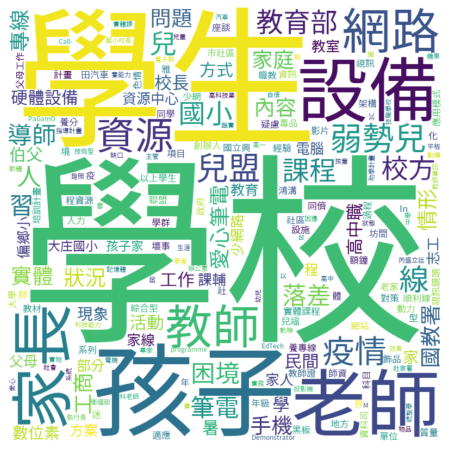

In [65]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

data = dict(zip(educationNounDF['Noun'].tolist(), educationNounDF['FREQ'].tolist()))

wordcloud = WordCloud(width = 800, height = 800, #設定畫布大小
                background_color ='white', #背景顏色
                min_font_size = 10, #最小字體
                font_path="TaipeiSansTCBeta-Regular.ttf") #畫中文的文字雲一定要設定字體路徑(你可以直接把字體放在存這份檔案的同一層)
wordcloud.generate_from_frequencies(frequencies=data) #繪製文字雲時有很多方法，其中一個方法就是將檔案轉為dictionary的格式
plt.figure(figsize = (8, 8)) #顯示的圖大小
plt.imshow(wordcloud, interpolation="bilinear") #這部分是有關顏色顯示的方式，參考:https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html
plt.axis("off") #不要有x,y軸的座標
plt.show() #顯示圖片

### 實作: 股市類

In [68]:
#畫出名詞頻率表格
stockNounLIST = sum(articut.getNounStemLIST(stockResultDICT),[])
nounLIST = []
for (a,b,c) in stockNounLIST:
    nounLIST.append(c)

stockNounDF = pd.DataFrame({"Noun":nounLIST})
stockNounDF = pd.value_counts(stockNounDF.Noun).to_frame().reset_index()
stockNounDF.columns = ['Noun','FREQ']
stockNounDF[:21]

,Noun,FREQ
0,營收,15
1,仁寶,8
2,元,7
3,宏碁,7
4,訂單,7
5,山,6
6,筆電,5
7,法人,5
8,科技,4
9,月,4


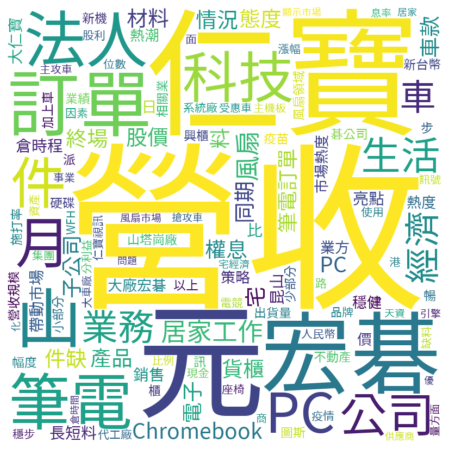

In [69]:
#製作文字雲
import matplotlib.pyplot as plt
from wordcloud import WordCloud

data = dict(zip(stockNounDF['Noun'].tolist(), stockNounDF['FREQ'].tolist()))

wordcloud = WordCloud(width = 800, height = 800, #設定畫布大小
                background_color ='white', #背景顏色
                min_font_size = 10, #最小字體
                font_path="TaipeiSansTCBeta-Regular.ttf") #畫中文的文字雲一定要設定字體路徑(你可以直接把字體放在存這份檔案的同一層)
wordcloud.generate_from_frequencies(frequencies=data) #繪製文字雲時有很多方法，其中一個方法就是將檔案轉為dictionary的格式
plt.figure(figsize = (8, 8)) #顯示的圖大小
plt.imshow(wordcloud, interpolation="bilinear") #這部分是有關顏色顯示的方式，參考:https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html
plt.axis("off") #不要有x,y軸的座標
plt.show() #顯示圖片

### 資料解釋
請你就上面名詞頻率的資料，說明兩類文本的差異以及各類文本的主要內容。

In [ ]:
#答案